In [1]:
from logicqubit.logic import *

logicqubit-gpu version 1.5.3


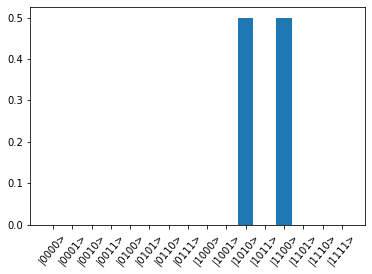

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4999999999999999, 0.0, 0.4999999999999999, 0.0, 0.0, 0.0]


In [2]:
# H|x>|0000>
# f0=0   U0=[[I,0],[0,I]], nada, não depende do valor de x
# f1=x   U1=[[I,0],[0,X]], CNOT(x,f1)
# f2=x+1 U2=[[X,0],[0,I]], CNOT(x,f2), X(f2)
# f3=1   U3=[[X,0],[0,X]], X(f3), não depende do valor de x

logicQuBit  = LogicQuBit(8)

x = Qubit()
f = QubitRegister(4)

x.H()
f[2].CNOT(x)
f[3].CNOT(x)
f[3].X()
f[4].X()

res = logicQuBit.Measure(f.getQubits())

logicQuBit.Plot()
print(res)

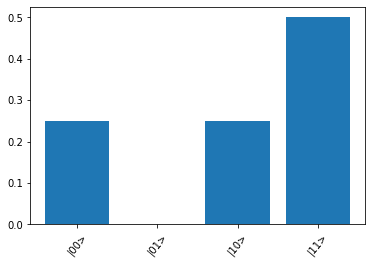

[0.2499999999999999, 0.0, 0.2499999999999999, 0.4999999999999998]


In [4]:
# H|x1,x2>|0000>
# x1 x2 y1 y2
# 0  0  1  1
# 0  1  0  0
# 1  0  1  1
# 1  1  1  0

# 1 x 00, 1 x 10, 2 x 11

# e00 00 - y1=1, x1x2+x1+x2+1 = x1x2
# e01 01 - y1=1, x1x2+x2 = x1!x2

logicQuBit  = LogicQuBit(8, first_left=True)

x1 = Qubit()
x2 = Qubit()

y1 = Qubit()
y2 = Qubit()
y3 = Qubit()

x1.H()
x2.H()

# pol = x1^0x2^0 + x1^0x2^1 + x1^1x2^0 + x1^1x2^1, onde x1^0x2^0 = 1

# p/ y2
#x00 => e00, p00 = (1,1,1,1)
y1.CCX(x1,x2)
y1.CX(x1)
y1.CX(x2)
y1.X()

#x01 => e01, p01 = (0,1,0,1)
#y1.CCX(x1,x2)
#y1.CX(x2)

#x10 => e10, p10 = (0,0,1,1)
y1.CCX(x1,x2)
y1.CX(x1)

#x11 => e11, p11 = (0,0,0,1)
y1.CCX(x1,x2)

# p/ y1
#e00, p00 = (1,1,1,1)
y2.CCX(x1,x2)
y2.CX(x1)
y2.CX(x2)
y2.X()

#e10, p10 = (0,0,1,1)
y2.CCX(x1,x2)
y2.CX(x1)

res = logicQuBit.Measure([y1, y2], True)

logicQuBit.Plot()
print(res)

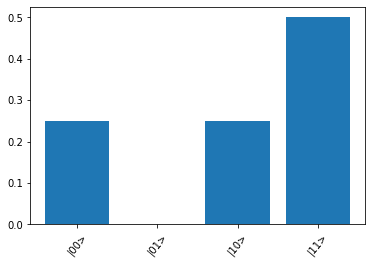

In [5]:
# H|x1,x2>|0000>
# x1 x2 y1 y2
# 0  0  1  1
# 0  1  0  0
# 1  0  1  1
# 1  1  1  0

# 1 x 00, 1 x 10, 2 x 11

# e00 00 - y1=1, x1x2+x1+x2+1 = x1x2
# e01 01 - y1=1, x1x2+x2 = x1!x2

logicQuBit  = LogicQuBit(4, first_left=False)

x1 = Qubit()
x2 = Qubit()

y1 = Qubit()
y2 = Qubit()

x1.H()
x2.H()

# pol = x1^0x2^0 + x1^0x2^1 + x1^1x2^0 + x1^1x2^1, onde x1^0x2^0 = 1

# p/ y1
#x00 => e00, p00 = (1,1,1,1)
#y1.CCX(x1,x2)
#y1.CX(x1)
#y1.CX(x2)
#y1.X()

#x01 => e01, p01 = (0,1,0,1)
#y1.CCX(x1,x2)
#y1.CX(x2)

#x10 => e10, p10 = (0,0,1,1)
#y1.CCX(x1,x2)
#y1.CX(x1)

#---------------------------
# p00+p10 = (1,1,0,0)
#y1.CX(x2)
#y1.X()

#x11 => e11, p11 = (0,0,0,1)
#y1.CCX(x1,x2)

#p00+p10+p11 = (1,1,0,1)
y1.CX(x2)
y1.X()
y1.CCX(x1,x2)

# p/ y2
#e00
#y2.CCX(x1,x2)
#y2.CX(x1)
#y2.CX(x2)
#y2.X()

#e10
#y2.CCX(x1,x2)
#y2.CX(x1)

#p00+p10 = (1,1,0,0)
y2.CX(x2)
y2.X()

res = logicQuBit.Measure([y1,y2], True)
logicQuBit.Plot()